<div style="font-weight: bold; color:#5D8AA8" align="center">
    <div style="font-size: xx-large">Métodos Funcionales en Aprendizaje Automático</div><br>
    <div style="font-size: x-large; color:gray">Manifold Learning</div><br>
    <div style="font-size: large">Ángela Fernández Pascual - Universidad Autónoma de Madrid</div><br></div><hr>
</div>

**Initial Configuration**

This cell defines the configuration of Jupyter Notebooks.

In [1]:
%%html
<style>
    .qst {background-color: #b1cee3; padding:10px; border-radius: 5px; border: solid 2px #5D8AA8;}
    .qst:before {font-weight: bold; content:"Exercise"; display: block; margin: 0px 10px 10px 10px;}
                   
    .tqst {background-color: #97d0a7; padding:10px; border-radius: 5px; border: solid 2px #63BA97;}
    .tqst:before {font-weight: bold; content:"Team Exercise"; display: block; margin: 0px 10px 10px 10px;}
           
    h1, h2, h3 {color: #5D8AA8;}
    .text_cell_render p {text-align: justify; text-justify: inter-word;}
</style>

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

This cell imports the packages to be used.

In [3]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.datasets import make_s_curve

from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, SpectralEmbedding
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import KernelPCA

from mpl_toolkits.mplot3d import Axes3D
Axes3D
matplotlib.rc('figure', figsize=(20, 8))
my_cmap = plt.cm.Spectral

seed = 123


# Dataset

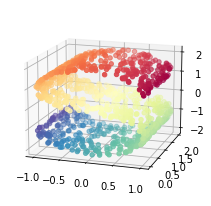

In [4]:
N = 1000
X, color = make_s_curve(N, random_state=seed)

fig = plt.figure()
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=my_cmap)
ax.view_init(15, -72)

# Comparison of different manifold learning methods

Let's try over the previous example some of the most well-known manifold learning methods, defined in *scikit-learn*.

<div class="tqst">

* Let's define a proper embedding of dimension 2 for the S curve dataset using the following methods:
    * MSD
    * Isomap
    * KPCA
    * LLE
    * LE
    * SC

* While trying these methods pay special atention to the following questions:
    * Which differences can you appreciate between embeddings?
    * Which method is the quickest and which one the slowest?
    * Which one is easiest to tune?

</div>

In [5]:
n_components = 2


In [10]:
from sklearn.manifold import MDS
from sklearn.manifold import Isomap, LocallyLinearEmbedding, SpectralEmbedding
from sklearn.decomposition import KernelPCA
from sklearn.cluster import SpectralClustering

import matplotlib.pyplot as plt

## MSD

<div class="tqst">

* Define a proper embedding using MSD and plot it for this example.

</div>

In [13]:
msd = MDS(n_components=2, metric=True, n_init=4, max_iter=300,verbose=0, eps=0.001, n_jobs=None, random_state=None, dissimilarity='euclidean')

In [27]:
manifold = msd.fit_transform(X)
manifold.shape


(1000, 2)

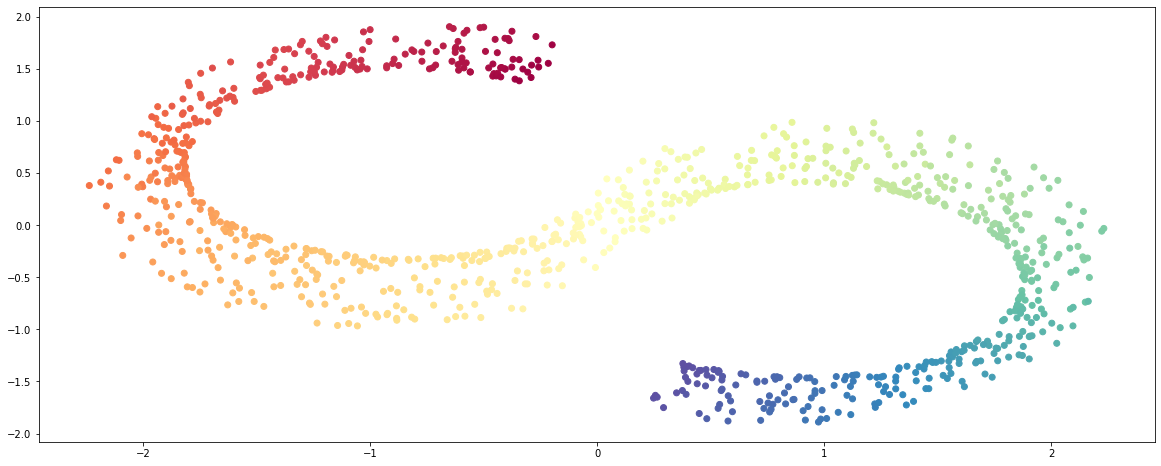

In [28]:
plt.scatter(manifold[:,0], manifold[:,1], marker='o', c=color, cmap=my_cmap)

## Isomap

<div class="tqst">

* Define a proper embedding using Isomap and plot it for this example.

</div>

In [15]:
isomap = Isomap(n_neighbors=5, n_components=2, eigen_solver='auto', tol=0,max_iter=None, path_method='auto', neighbors_algorithm='auto', n_jobs=None, metric='minkowski', p=2, metric_params=None)

In [24]:
manifold = isomap.fit_transform(X)
manifold.shape

(1000, 2)

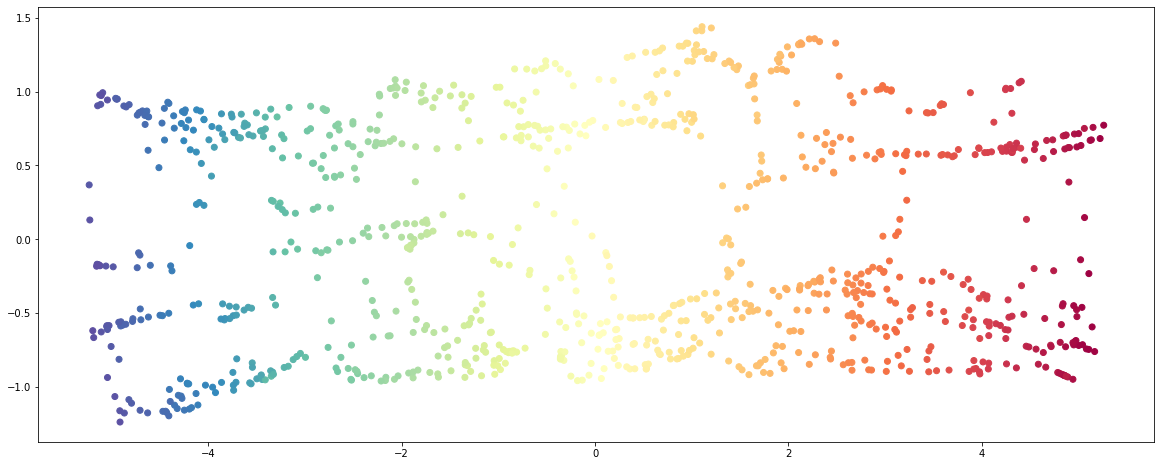

In [26]:
plt.scatter(manifold[:,0], manifold[:,1], marker='o', c=color, cmap=my_cmap)

## KPCA

<div class="tqst">

* Define a proper embedding using KPCA and plot it for this example.

</div>

In [29]:
kpca = KernelPCA(n_components=n_components, kernel='linear', gamma=None, degree=3, coef0=1, kernel_params=None, alpha=1.0, fit_inverse_transform=False,eigen_solver='auto', tol=0, max_iter=None, remove_zero_eig=False, random_state=None,copy_X=True, n_jobs=None)

In [30]:
manifold = kpca.fit_transform(X)
manifold.shape

(1000, 2)

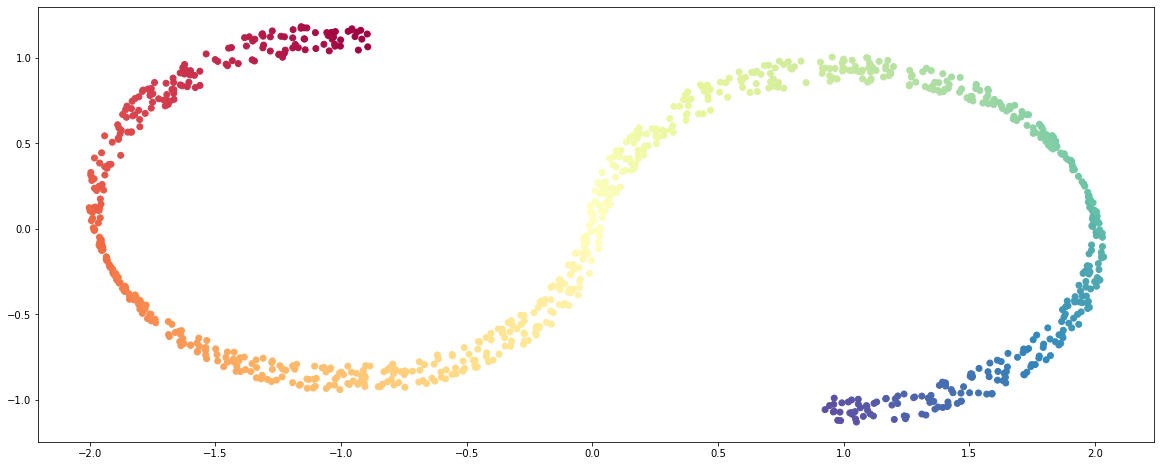

In [31]:
plt.scatter(manifold[:,0], manifold[:,1], marker='o', c=color, cmap=my_cmap)

## SC

<div class="tqst">

* Define a proper embedding using SC.

</div>

In [38]:
sc = SpectralClustering(n_clusters=8, eigen_solver=None,n_components=None, random_state=None, n_init=10, gamma=1.0, affinity='rbf',n_neighbors=10, eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1,kernel_params=None, n_jobs=None, verbose=False)

In [39]:
manifold = sc.fit_predict(X)


/usr/local/lib/python3.9/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


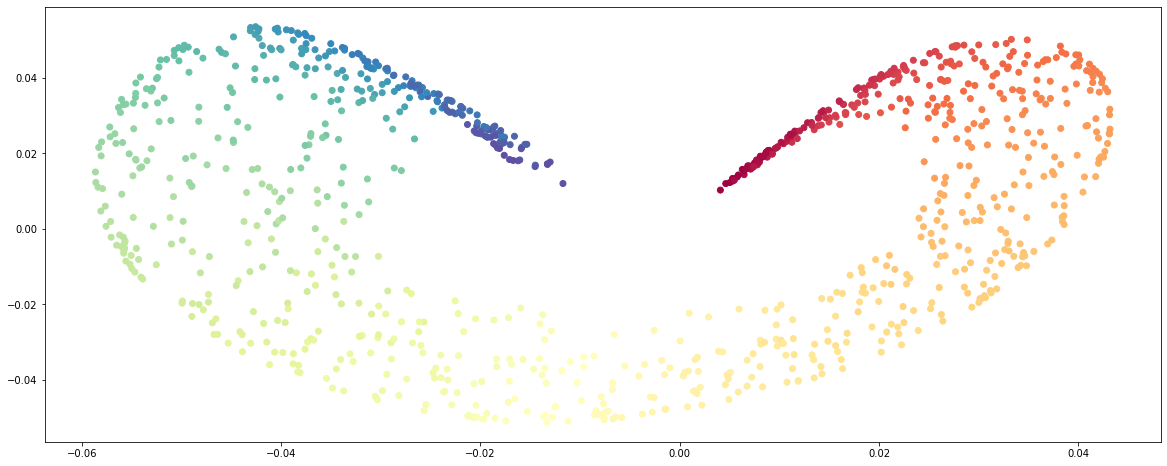

In [47]:
L = sc.affinity_matrix_

lamb, V = np.linalg.eig(L)
id_lamb = lamb.argsort()[::-1]
v_ord = V[:,id_lamb]

plt.scatter (v_ord[:,1], v_ord[:,2],  c=color, cmap=my_cmap)
plt.show()

## LLE

<div class="tqst">

* Define a proper embedding using LLE.

</div>

In [60]:
lle = LocallyLinearEmbedding(n_neighbors=20, n_components=2, reg=0.001,eigen_solver='auto', tol=1e-06, max_iter=100, method='standard', hessian_tol=0.0001,modified_tol=1e-12, neighbors_algorithm='auto', random_state=None, n_jobs=None)

In [61]:
X_transform = lle.fit_transform(X)

In [55]:
X_transform.shape

(1000, 2)

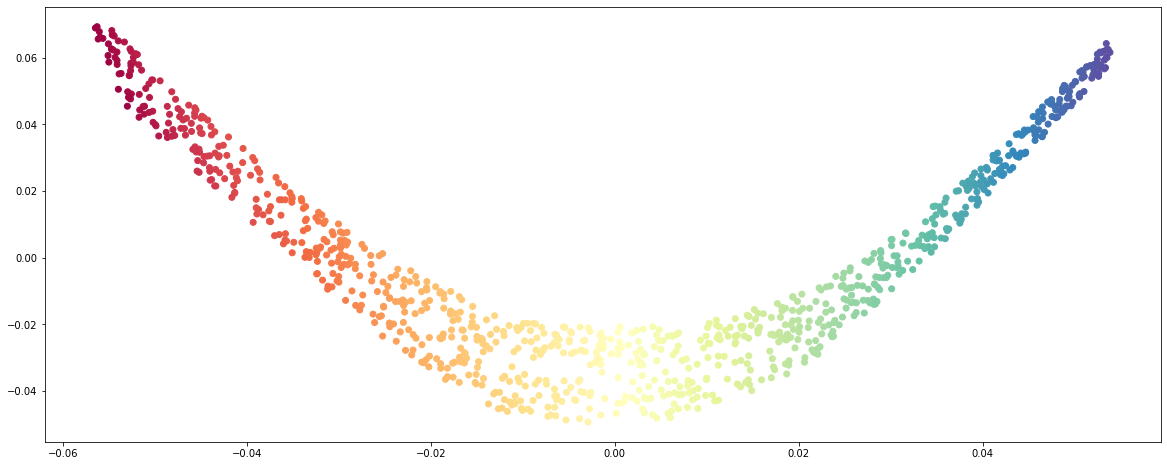

In [62]:
plt.scatter(X_transform[:,0], X_transform[:,1], marker='o', c=color, cmap=my_cmap)

## LE

<div class="tqst">

* Define a proper embedding using LE.

</div>

In [75]:
le = SpectralEmbedding(n_components=10, affinity='nearest_neighbors',gamma=None, random_state=None, eigen_solver=None, n_neighbors=None, n_jobs=None)


In [76]:
X_transform = le.fit_transform(X)

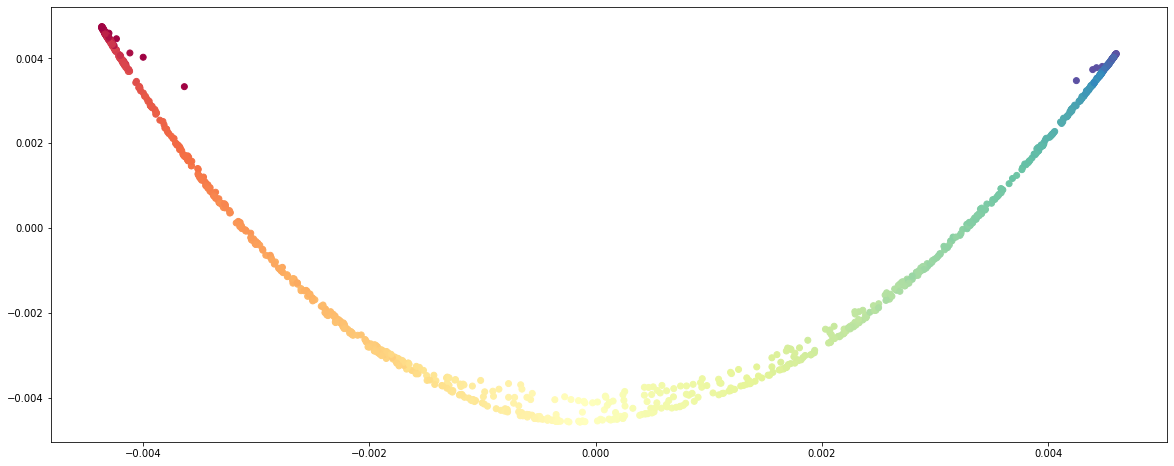

In [77]:
plt.scatter(X_transform[:,0], X_transform[:,1], marker='o', c=color, cmap=my_cmap)